<a href="https://colab.research.google.com/github/Kaustubh-Amare/NYC-taxi-trip-time-prediction-ML-regresssion/blob/main/NYC_taxi_trip_prediction_ML_kaustubh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1- importing libraries




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

import warnings 
warnings.filterwarnings("ignore")
print("libraries import succesfully")



libraries import succesfully


## Step 2 :- Import  and overview Data set

> Indented block



In [3]:
path = '/content/drive/MyDrive/DATA_SCI_almabetter/drive_data/NYC_Taxi_Data.csv'
df = pd.read_csv(path)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
df.shape

(1458644, 11)

In [7]:
missing_val_count_by_column = df.isnull().sum()/len(df)

In [8]:
missing_val_count_by_column

id                    0.0
vendor_id             0.0
pickup_datetime       0.0
dropoff_datetime      0.0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag    0.0
trip_duration         0.0
dtype: float64

>maing copy of data set

In [9]:
wkdf= df.copy() # working df

In [10]:
wkdf.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [11]:
# Defining a function
def complete_info():
    null = pd.DataFrame(index=wkdf.columns)
    null['data_type'] = wkdf.dtypes
    null['null_count'] = wkdf.isnull().sum()
    null['unique_count'] = wkdf.nunique()
    return null

In [12]:
complete_info()

,data_type,null_count,unique_count
id,object,0,1458644
vendor_id,int64,0,2
pickup_datetime,object,0,1380222
dropoff_datetime,object,0,1380377
passenger_count,int64,0,10
pickup_longitude,float64,0,23047
pickup_latitude,float64,0,45245
dropoff_longitude,float64,0,33821
dropoff_latitude,float64,0,62519
store_and_fwd_flag,object,0,2


## step 3 modify data set
>feature engieering

In [13]:
# converting columns from object to date time
wkdf['pickup_datetime'] = pd.to_datetime(wkdf['pickup_datetime'])
wkdf['dropoff_datetime'] = pd.to_datetime(wkdf['dropoff_datetime'])

In [14]:
wkdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


> Extracting pickup month, day of week ,day, hour 

In [15]:
#Creating datetime features based on pickup_datetime
import calendar
wkdf['pickup_date'] = wkdf[ 'pickup_datetime'].dt.date
wkdf['pickup_day']=wkdf [ 'pickup_datetime'].apply(lambda x:x.day)
wkdf['pickup_hour']=wkdf['pickup_datetime'].apply(lambda x:x.hour)
wkdf['pickup_day_of_week' ]=wkdf['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
wkdf['pickup_DOW_NO']=wkdf['pickup_datetime'].dt.weekday
wkdf['pickup_month']=wkdf [ 'pickup_datetime'].apply(lambda x:x.month)
wkdf['pickup_year']=wkdf['pickup_datetime'].apply(lambda x:x.year)
wkdf.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_DOW_NO,pickup_month,pickup_year
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,14,17,Monday,0,3,2016
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,12,0,Sunday,6,6,2016
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,19,11,Tuesday,1,1,2016
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,6,19,Wednesday,2,4,2016
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,26,13,Saturday,5,3,2016


In [16]:
#Creating datetime features based on dropoff_datetime
import calendar
wkdf['dropoff_date'] = wkdf[ 'dropoff_datetime'].dt.date
wkdf['dropoff_day']=wkdf [ 'dropoff_datetime'].apply(lambda x:x.day)
wkdf['dropoff_hour']=wkdf['dropoff_datetime'].apply(lambda x:x.hour)
wkdf['dropoff_day_of_week' ]=wkdf['dropoff_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
wkdf['dropoff_DOW_NO']=wkdf['dropoff_datetime'].dt.weekday
wkdf['dropoff_month']=wkdf [ 'dropoff_datetime'].apply(lambda x:x.month)
wkdf['dropoff_year']=wkdf['dropoff_datetime'].apply(lambda x:x.year)
wkdf.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_DOW_NO,pickup_month,pickup_year,dropoff_date,dropoff_day,dropoff_hour,dropoff_day_of_week,dropoff_DOW_NO,dropoff_month,dropoff_year
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,3,2016,2016-03-14,14,17,Monday,0,3,2016
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,2016,2016-06-12,12,0,Sunday,6,6,2016
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,2016,2016-01-19,19,12,Tuesday,1,1,2016
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2,4,2016,2016-04-06,6,19,Wednesday,2,4,2016
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,3,2016,2016-03-26,26,13,Saturday,5,3,2016


### calculating distance

In [17]:
#importing geopy library
from geopy.distance import geodesic

In [18]:
#Creating the function for calculating distance between pickup and dropoff
def distance_cal(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return geodesic(start_coordinates,stop_coordinates).km

In [19]:
#Applying the function to our dataset and creating the feature ‘distance’.
wkdf['distance'] = wkdf.apply(lambda x: distance_cal(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [20]:
wkdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   id                   1458644 non-null  object        
 1   vendor_id            1458644 non-null  int64         
 2   pickup_datetime      1458644 non-null  datetime64[ns]
 3   dropoff_datetime     1458644 non-null  datetime64[ns]
 4   passenger_count      1458644 non-null  int64         
 5   pickup_longitude     1458644 non-null  float64       
 6   pickup_latitude      1458644 non-null  float64       
 7   dropoff_longitude    1458644 non-null  float64       
 8   dropoff_latitude     1458644 non-null  float64       
 9   store_and_fwd_flag   1458644 non-null  object        
 10  trip_duration        1458644 non-null  int64         
 11  pickup_date          1458644 non-null  object        
 12  pickup_day           1458644 non-null  int64         
 1

>One hot encoding

In [21]:
wkdf= pd.get_dummies(wkdf, columns=['store_and_fwd_flag'])

In [22]:
wkdf= pd.get_dummies(wkdf, columns=['pickup_day_of_week','dropoff_day_of_week'])

In [23]:
wkdf.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,pickup_day_of_week_Thursday,pickup_day_of_week_Tuesday,pickup_day_of_week_Wednesday,dropoff_day_of_week_Friday,dropoff_day_of_week_Monday,dropoff_day_of_week_Saturday,dropoff_day_of_week_Sunday,dropoff_day_of_week_Thursday,dropoff_day_of_week_Tuesday,dropoff_day_of_week_Wednesday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,...,0,0,0,0,1,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,...,0,0,0,0,0,0,1,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,...,0,1,0,0,0,0,0,0,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,...,0,0,1,0,0,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,...,0,0,0,0,0,1,0,0,0,0


>Calculating Speed in km/hr from the column duration and distance.

In [24]:
wkdf['Speed']= (wkdf.distance/(wkdf.trip_duration/3600))

In [25]:
wkdf.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,pickup_day_of_week_Tuesday,pickup_day_of_week_Wednesday,dropoff_day_of_week_Friday,dropoff_day_of_week_Monday,dropoff_day_of_week_Saturday,dropoff_day_of_week_Sunday,dropoff_day_of_week_Thursday,dropoff_day_of_week_Tuesday,dropoff_day_of_week_Wednesday,Speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,...,0,0,0,1,0,0,0,0,0,11.885316
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,...,0,0,0,0,0,1,0,0,0,9.820778
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,...,1,0,0,0,0,0,0,1,0,10.813029
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,...,0,1,0,0,0,0,0,0,1,12.450063
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,...,0,0,0,0,1,0,0,0,0,9.823760


In [26]:
wkdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 40 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   id                             1458644 non-null  object        
 1   vendor_id                      1458644 non-null  int64         
 2   pickup_datetime                1458644 non-null  datetime64[ns]
 3   dropoff_datetime               1458644 non-null  datetime64[ns]
 4   passenger_count                1458644 non-null  int64         
 5   pickup_longitude               1458644 non-null  float64       
 6   pickup_latitude                1458644 non-null  float64       
 7   dropoff_longitude              1458644 non-null  float64       
 8   dropoff_latitude               1458644 non-null  float64       
 9   trip_duration                  1458644 non-null  int64         
 10  pickup_date                    1458644 non-null  objec

> Creating copy of Fully equippped data set.

In [27]:
NYC_Taxi_time_DFraw = wkdf.copy()       # this Raw df will be untouched and will be called only if needed.
NYC_Taxi_time_DFraw.info()
                                                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 40 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   id                             1458644 non-null  object        
 1   vendor_id                      1458644 non-null  int64         
 2   pickup_datetime                1458644 non-null  datetime64[ns]
 3   dropoff_datetime               1458644 non-null  datetime64[ns]
 4   passenger_count                1458644 non-null  int64         
 5   pickup_longitude               1458644 non-null  float64       
 6   pickup_latitude                1458644 non-null  float64       
 7   dropoff_longitude              1458644 non-null  float64       
 8   dropoff_latitude               1458644 non-null  float64       
 9   trip_duration                  1458644 non-null  int64         
 10  pickup_date                    1458644 non-null  objec

## Step 3 :- Processing outliers and feature exploration and EDA
> Processing outliers before scalling is neccessary as if not done now, it will contribute while scaling

> passenger count

In [28]:
# Checking unique passenger count in passenger_columnnusing pandas value_count method

wkdf['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

> there should be no trips with 0 passengers, this 60 entries must be system malfuntion. there are very few trips with 7,8, & 9 passengers. Thus we can drop this row.

In [29]:
wkdf = wkdf[(wkdf['passenger_count'] != 0) & (wkdf['passenger_count'] <= 6)]


>distance

In [30]:
wkdf['distance'].value_counts()


0.000000     5887
2.064458        2
0.942752        2
0.000644        2
1.289928        2
             ... 
2.817283        1
26.281212       1
2.252518        1
2.133112        1
1.133655        1
Name: distance, Length: 1452682, dtype: int64

There are 5887 entries with trip distance = 0 km, this must be cancelled trips , hence not required.
 

In [31]:
# seperating our data from trip distance = 0.0km

wkdf = wkdf[wkdf['distance'] != wkdf['distance'].min()]

#Removing entries which are having distance less than 50 metere
wkdf = wkdf[wkdf['distance'] > 0.05]

>duration

In [32]:
wkdf['trip_duration'].sort_values(ascending= False)


978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
287664           2
682599           2
1439166          1
467645           1
269418           1
Name: trip_duration, Length: 1447295, dtype: int64

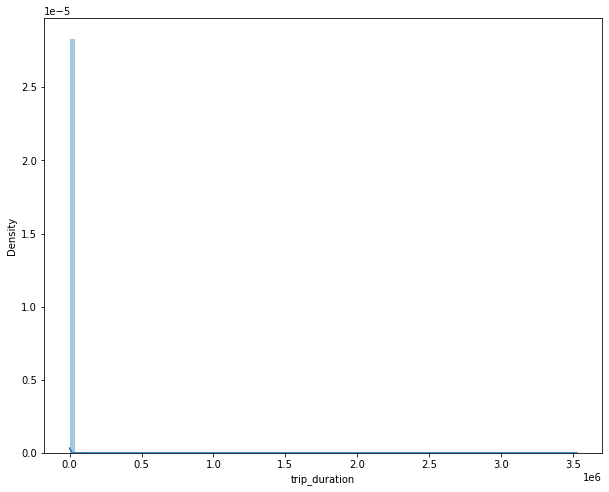

In [33]:
#checking distribution before log transformation
# and then cheking distribution

plt.figure(figsize=(10, 8))
sns.distplot((wkdf['trip_duration']), bins = 100)

plt.show()

there are  few entries with very high duration and with very duration i.e 1 sec. this is not required and errorneous data
> we will try log transformation to normalize the values

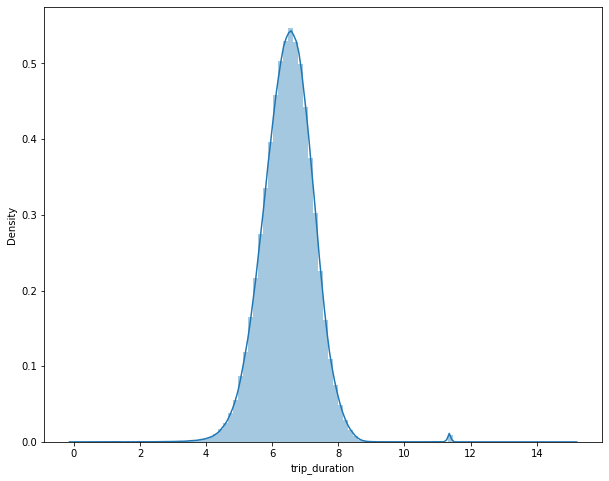

In [34]:
# converting trip_duration column into log transformation
# and then cheking distribution

plt.figure(figsize=(10, 8))
sns.distplot(np.log(wkdf['trip_duration']), bins = 100)

plt.show()

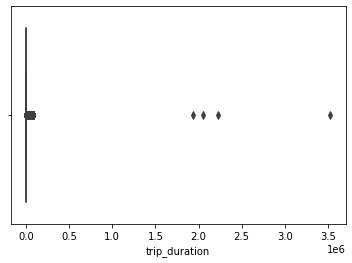

In [35]:
# Box plot for visualizing outliers
sns.boxplot(wkdf['trip_duration'])

In [36]:
#lets see percentile from 0 to 100
for i in range(0,100,10):
  duration= wkdf['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
10 percentile value is 250
20 percentile value is 352
30 percentile value is 449
40 percentile value is 551
50 percentile value is 665
60 percentile value is 800
70 percentile value is 970
80 percentile value is 1211
90 percentile value is 1637
100 percentile value is  3526282


In [37]:
#lets see percentile from 90 to 100 
for i in range(90,100):
  duration= wkdf['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1637
91 percentile value is 1706
92 percentile value is 1783
93 percentile value is 1872
94 percentile value is 1979
95 percentile value is 2108
96 percentile value is 2276
97 percentile value is 2500
98 percentile value is 2833
99 percentile value is 3443
100 percentile value is  3526282


In [38]:
#lets see percentile from 0 to 10 
for i in range(0,10):
  duration= wkdf['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
1 percentile value is 103
2 percentile value is 132
3 percentile value is 154
4 percentile value is 171
5 percentile value is 186
6 percentile value is 200
7 percentile value is 214
8 percentile value is 226
9 percentile value is 238
100 percentile value is  3526282


In [39]:
# Assumimg more time than this as system error or bug
# Trip duration upper limit 
wkdf = wkdf[wkdf.trip_duration <= 3500]      

# Assuming rides smaller than 1 minute as cancelled quickly
# Trip duration lower limit 
wkdf = wkdf[wkdf.trip_duration >= 60]        

In [40]:
wkdf.shape

(1430190, 40)

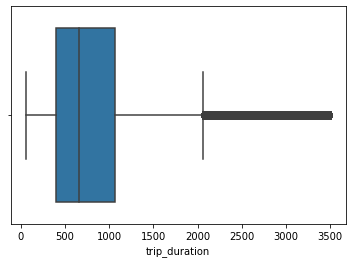

In [41]:
# trip duration box plot after Outliers removal
sns.boxplot(wkdf['trip_duration'])

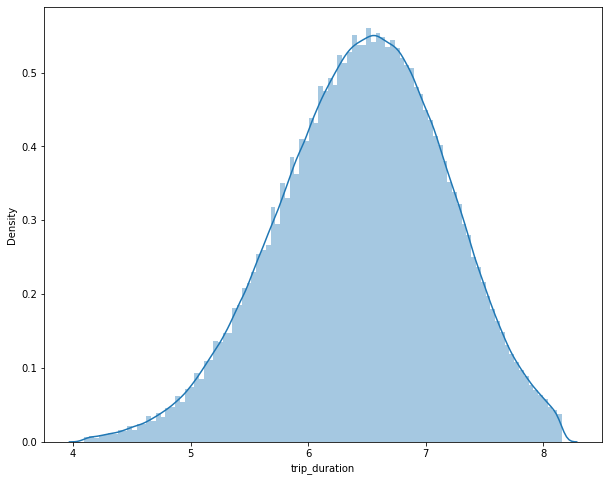

In [42]:
# Checking distribution after outliers treatment.

plt.figure(figsize=(10, 8))
sns.distplot(np.log(wkdf['trip_duration']), bins = 100)

plt.show()

>Speed

In [43]:
wkdf['Speed'].sort_values(ascending= False)


910072     6874.214785
184925     5638.682980
974378     5253.665463
377068     4090.789812
1013474    1760.893664
              ...     
80649         0.066255
202836        0.065004
116594        0.063403
1171901       0.060569
1343760       0.059513
Name: Speed, Length: 1430190, dtype: float64

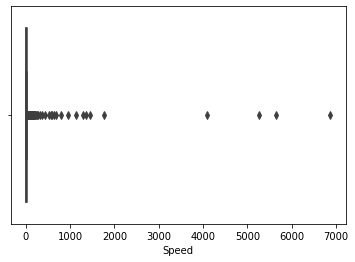

In [44]:
# Speed outliers check
sns.boxplot(wkdf['Speed'])

Maximum speed limosine can sustain in the city like newyork given that roads are empty i.e its late night or early morning is arround 150kmph

*   Still there is speed reading in Thousands (absurd), there is clearly some error or bug in apps calculaion, as its out of mechanical abilities of vehicle 
*   We will limit the data set to 120 kmph (giving it benefit of doubt as cars can go at that speed during less traffic hours) and 5 kmph, as entries out side of this limit will not contribute in ML model much rather make it less accurate


In [45]:
wkdf = wkdf[wkdf['Speed']<=120]
wkdf = wkdf[wkdf['Speed']>=5]

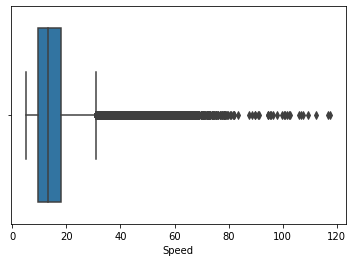

In [46]:
# Speed outliers check after outliers removal
sns.boxplot(wkdf['Speed'])

Correlation

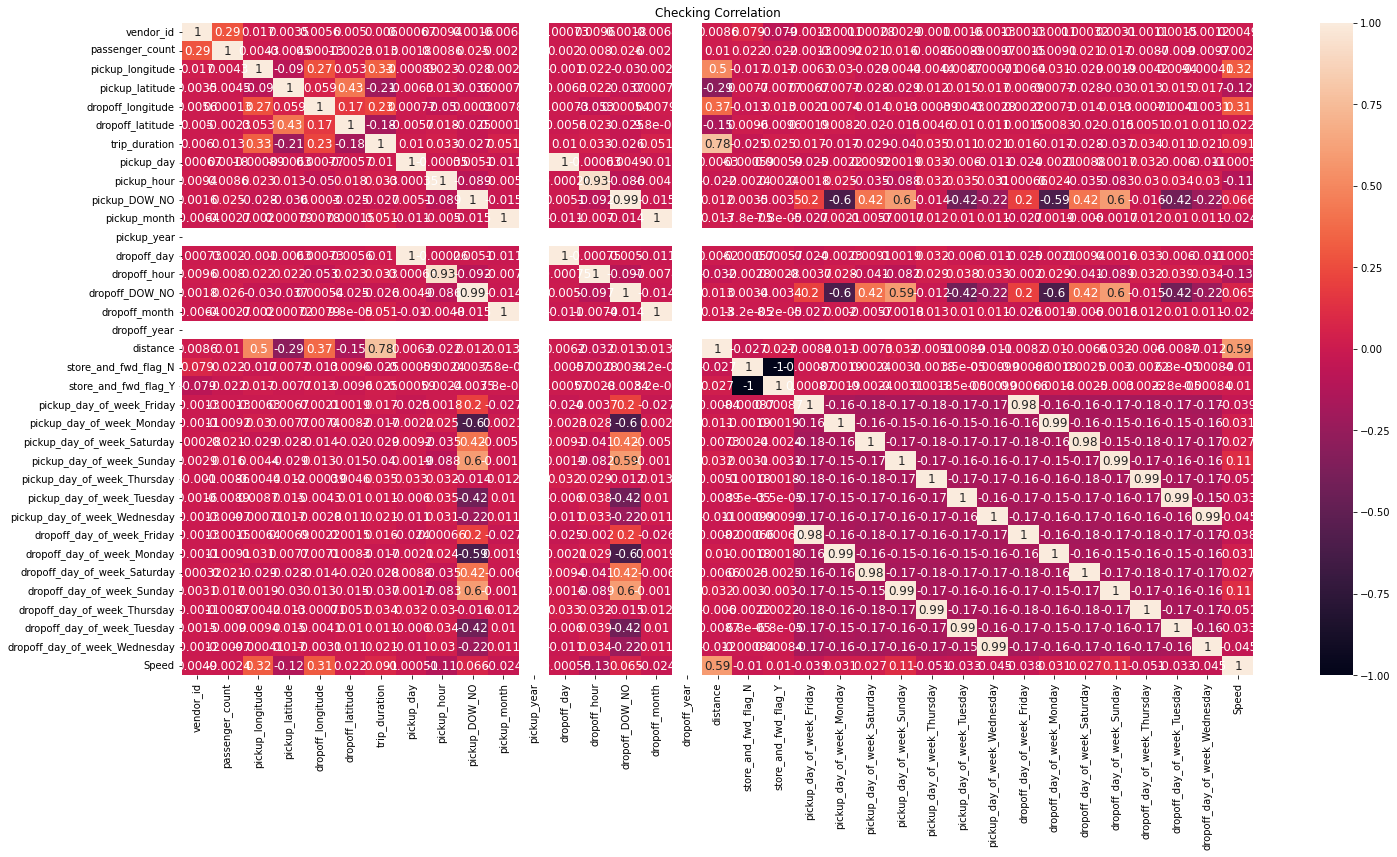

In [47]:
# Checking Correlation

plt.figure(figsize=(24,12))

cor = wkdf.corr() # getting correlation using corr() function

sns.heatmap(cor, annot=True, annot_kws={"size":12})

plt.title("Checking Correlation")
plt.show()

In [48]:
# This function returns highly correlated columns w.r.t given threshold
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [49]:
# Calling the finction with threshold value 0.90

high_corr_features = correlation(wkdf, 0.90)
print('Number of correlated features :',len(set(high_corr_features))) # getting the number of correlated features

Number of correlated features : 12


In [50]:
high_corr_features

{'dropoff_DOW_NO',
 'dropoff_day',
 'dropoff_day_of_week_Friday',
 'dropoff_day_of_week_Monday',
 'dropoff_day_of_week_Saturday',
 'dropoff_day_of_week_Sunday',
 'dropoff_day_of_week_Thursday',
 'dropoff_day_of_week_Tuesday',
 'dropoff_day_of_week_Wednesday',
 'dropoff_hour',
 'dropoff_month',
 'store_and_fwd_flag_Y'}

Dropping these high correlated columns

In [51]:
wkdf.drop(['dropoff_DOW_NO','dropoff_day','dropoff_day_of_week_Monday','dropoff_day_of_week_Tuesday','dropoff_day_of_week_Wednesday','dropoff_day_of_week_Thursday','dropoff_day_of_week_Friday','dropoff_day_of_week_Saturday','dropoff_day_of_week_Sunday','dropoff_hour','dropoff_month','store_and_fwd_flag_Y'], axis=1 , inplace = True)

In [52]:
wkdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372404 entries, 0 to 1458643
Data columns (total 28 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   id                            1372404 non-null  object        
 1   vendor_id                     1372404 non-null  int64         
 2   pickup_datetime               1372404 non-null  datetime64[ns]
 3   dropoff_datetime              1372404 non-null  datetime64[ns]
 4   passenger_count               1372404 non-null  int64         
 5   pickup_longitude              1372404 non-null  float64       
 6   pickup_latitude               1372404 non-null  float64       
 7   dropoff_longitude             1372404 non-null  float64       
 8   dropoff_latitude              1372404 non-null  float64       
 9   trip_duration                 1372404 non-null  int64         
 10  pickup_date                   1372404 non-null  object        
 11

In [53]:
# dropping off some not required columns as 
wkdf.drop(['id', 'store_and_fwd_flag_N', 'dropoff_year','pickup_year'], axis = 1, inplace = True)


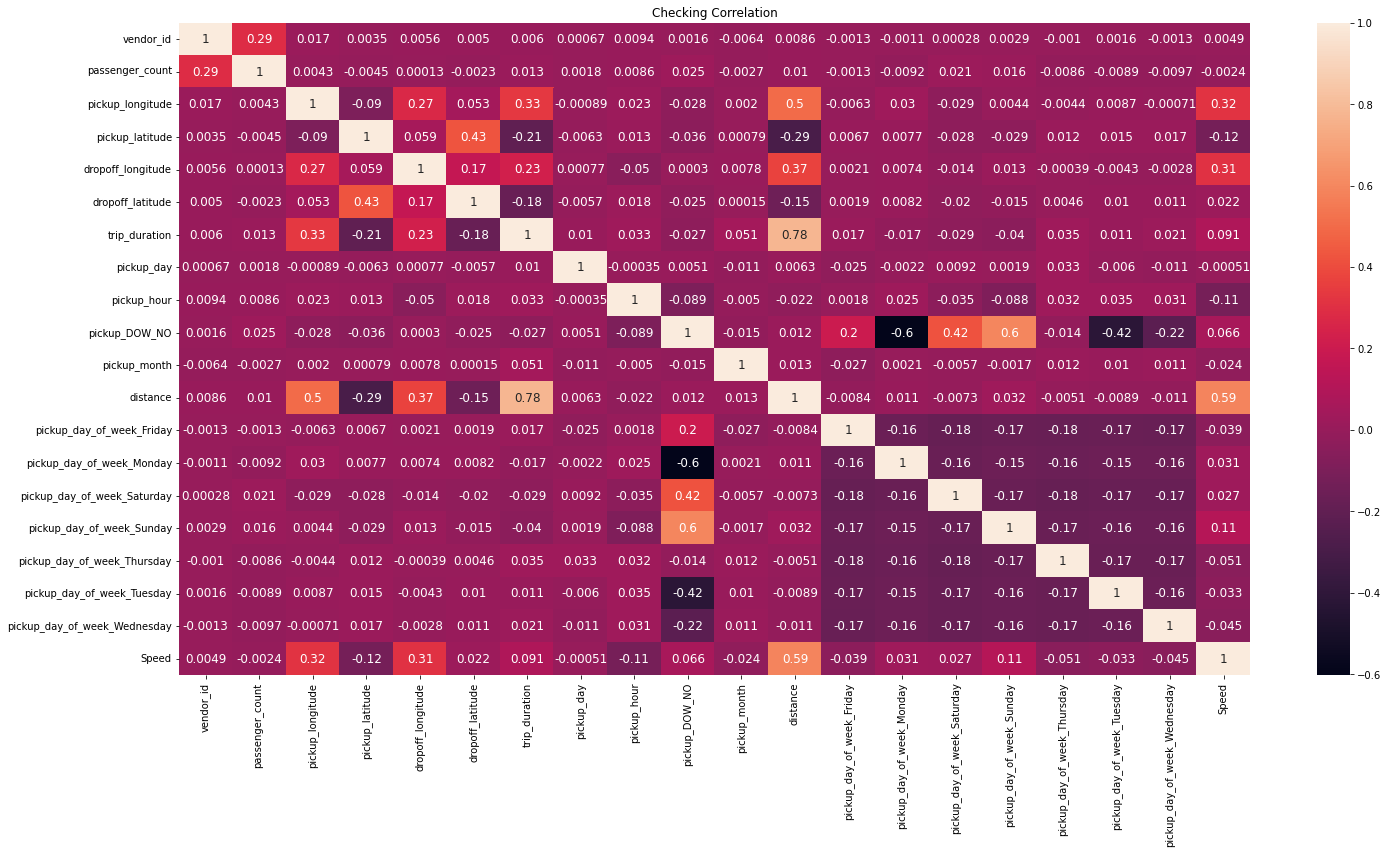

In [54]:
# Checking Correlation

plt.figure(figsize=(24,12))

cor2 = wkdf.corr() # getting correlation using corr() function

sns.heatmap(cor2, annot=True, annot_kws={"size":12})

plt.title("Checking Correlation")
plt.show()

In [55]:
wkdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372404 entries, 0 to 1458643
Data columns (total 24 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   vendor_id                     1372404 non-null  int64         
 1   pickup_datetime               1372404 non-null  datetime64[ns]
 2   dropoff_datetime              1372404 non-null  datetime64[ns]
 3   passenger_count               1372404 non-null  int64         
 4   pickup_longitude              1372404 non-null  float64       
 5   pickup_latitude               1372404 non-null  float64       
 6   dropoff_longitude             1372404 non-null  float64       
 7   dropoff_latitude              1372404 non-null  float64       
 8   trip_duration                 1372404 non-null  int64         
 9   pickup_date                   1372404 non-null  object        
 10  pickup_day                    1372404 non-null  int64         
 11

In [56]:
# dropping off some not required columns as date is already available in date time format 
wkdf.drop(['pickup_date', 'dropoff_date'], axis = 1, inplace = True)

In [57]:
wkdf.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1, inplace = True)

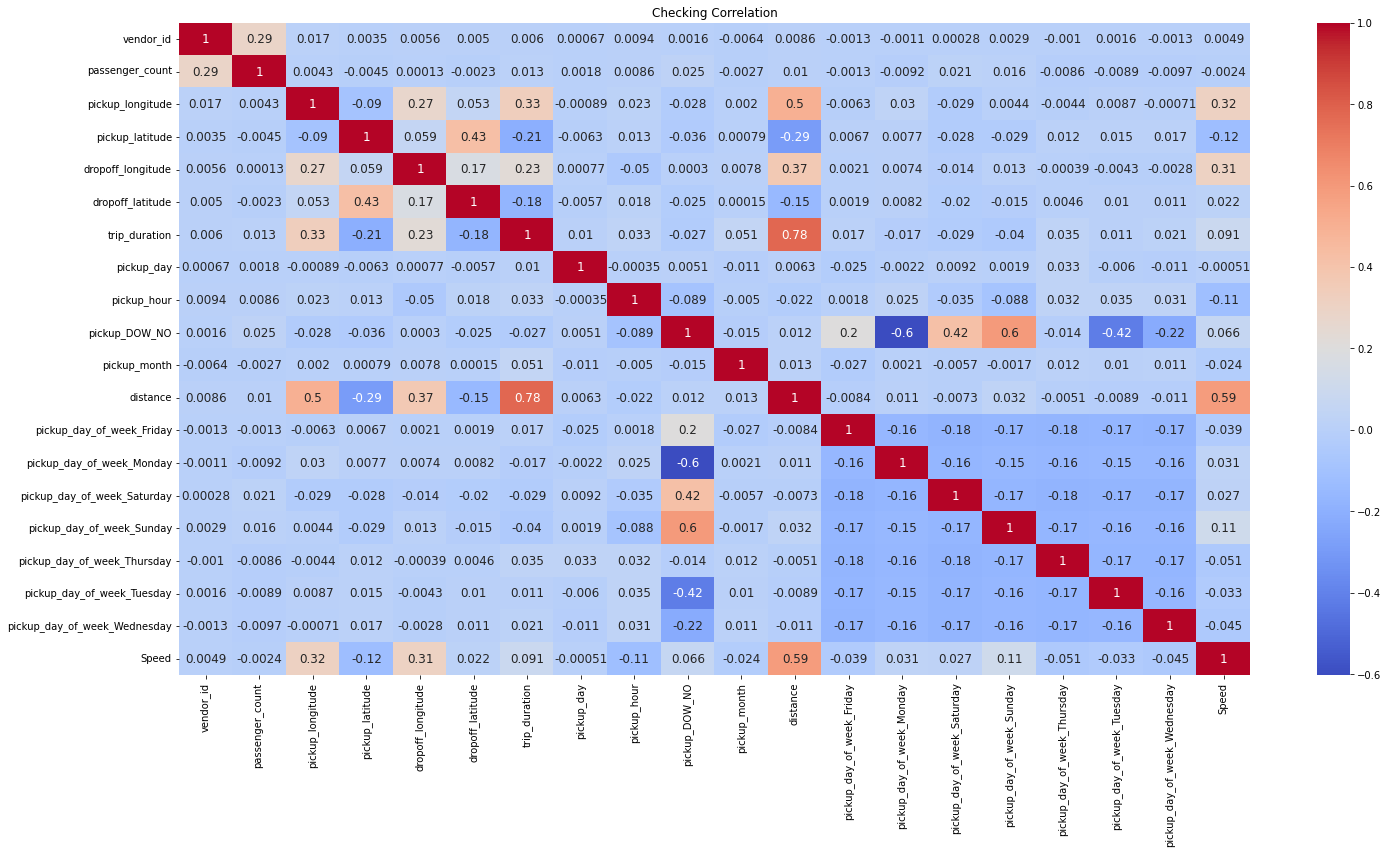

In [58]:
# Checking Correlation

plt.figure(figsize=(24,12))

cor2 = wkdf.corr() # getting correlation using corr() function

sns.heatmap(cor2, annot=True, cmap='coolwarm' , annot_kws={"size":12})

plt.title("Checking Correlation")
plt.show()

In [59]:
wkdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372404 entries, 0 to 1458643
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   vendor_id                     1372404 non-null  int64  
 1   passenger_count               1372404 non-null  int64  
 2   pickup_longitude              1372404 non-null  float64
 3   pickup_latitude               1372404 non-null  float64
 4   dropoff_longitude             1372404 non-null  float64
 5   dropoff_latitude              1372404 non-null  float64
 6   trip_duration                 1372404 non-null  int64  
 7   pickup_day                    1372404 non-null  int64  
 8   pickup_hour                   1372404 non-null  int64  
 9   pickup_DOW_NO                 1372404 non-null  int64  
 10  pickup_month                  1372404 non-null  int64  
 11  distance                      1372404 non-null  float64
 12  pickup_day_of_week_Friday   

> correlation processing done

## Seperating  X and Y data

In [60]:
model_df= wkdf.copy()

In [61]:
# seperating our data in feature and target varibles
x = model_df.drop(['trip_duration'], axis = 1)

# taking our target variable into log form 
# as we saw in previous analysis that using log form trip_duration column is showing normal distribution

y = np.log(model_df['trip_duration']).values

>Spliting data

In [62]:
from sklearn.model_selection import train_test_split 

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 70% train and 30 % test


In [64]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape # check shape


((960682, 19), (411722, 19), (960682,), (411722,))

>importing libraries for ML

In [65]:
# importing Linear regression from sklearn
from sklearn.linear_model import LinearRegression

# importing various matrics that well help us to analyze our regression model
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

# importing decision tree regressor from sklearn
from sklearn.tree import DecisionTreeRegressor

# importing randon forest regressor from sklearn
from sklearn.ensemble import RandomForestRegressor

# Importing XGBOOST
import xgboost

# import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#import ridge regression
from sklearn.linear_model import Ridge

# import lasso regression 
from sklearn.linear_model import Lasso

#import elastic net regression
from sklearn.linear_model import ElasticNet

# import polynomial regression
from sklearn.preprocessing import PolynomialFeatures




>test new model functiona

In [66]:
# final list of models

models = [ElasticNet, Lasso, LinearRegression, DecisionTreeRegressor, RandomForestRegressor, xgboost, Ridge]

# function that will fit our models and train our models
def run_ml_models(models):
    scores = []
    
    for i in models:
        
        if i == LinearRegression:
            
            # Creating instance for our model
            model = LinearRegression()
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            # taking prediction from our model using .predict function
            print('Prediction by LinearRegression :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model, model.predict(x_test)))        
        
    
        elif i == DecisionTreeRegressor:
            
            # Creating instance for our model
            model = DecisionTreeRegressor(criterion = 'mse', max_depth = 10)
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)

            # taking prediction from our model using .predict function
            print('\nPrediction by DecisionTreeRegressor :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test))) 

        elif i == Ridge:
          
            # Creating instance for our model
            model = Ridge()
          
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
          
            # taking prediction from our model using .predict function
            print('\nPrediction by Ridge regression :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test)))
            
            
        elif i == RandomForestRegressor:
            
             # Creating instance for our model
            model = RandomForestRegressor(criterion = 'mse', n_estimators = 10 ,
                                              max_depth = 10)
            
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
            
            # taking prediction from our model using .predict function
            print('\nPrediction by RandomForestRegressor :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test)))
        
        elif i == xgboost:
          
            # Creating instance for our model
            model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10)
          
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
          
            # taking prediction from our model using .predict function
            print('\nPrediction by Xgboost :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test)))

        elif i == Lasso:
          
            # Creating instance for our model
            model = Lasso(alpha=1.0)
          
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
          
            # taking prediction from our model using .predict function
            print('\nPrediction by Lasso :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test)))

        elif i == ElasticNet:
          
            # Creating instance for our model
            model = ElasticNet(alpha=1.0, l1_ratio=0.5)
          
            # fitting our model using .fit funtion
            model.fit(x_train,y_train)
          
            # taking prediction from our model using .predict function
            print('\nPrediction by ElasticNet :\n', model.predict(x_test))

            #prediction actual vs predicted plot
            tr_vs_pred_plot(y_test, model.predict(x_test))

            # appending scores to the list
            scores.append(model_results(model,model.predict(x_test)))

        

       
    
     
    #printing all the scores for each model
    result = pd.concat(scores).reset_index(drop = True)
    return result.set_index(pd.Series(['ElasticNet','Lasso','Linear Regression', 'Decision Tree Regression', 'Random Forest Regression','XGboost','Ridge Regression']))

> Functions to be used in "run_ml_models" function, defined above.

In [67]:
# Function that will calculate the accuracy, r2 and RMSE scores

def model_results(model,y_predicted):
    
    # getting Training Accuracy
    train_scr = model.score(x_train, y_train)
    
    #getting Test Accuracy
    test_scr = model.score(x_test, y_test)
    
    # getting R2 score
    r2_scr = r2_score(y_test, y_predicted)

    #Getting Adjusted R2 score
    p = x.shape[1]
    n = y_test.shape[0]
    a = (1 - r2_scr)
    b = (n - 1) / (n - p - 1)
    adj_r2_scr = (1 - (a * b))
    
    #getting mse
    mse = mean_squared_error(y_test,y_predicted)

    # getting RMSE
    rmse = np.sqrt(mse)
        
    matrics_name = ['Training_Score', 'Testing_Score', 'R2_Score', 'ADJ_R2', 'MSE', 'RMSE']
    matrics_value = [train_scr, test_scr, r2_scr, adj_r2_scr, mse, rmse]
    
    total_matrics = dict(zip(matrics_name,matrics_value))

    df = pd.DataFrame(data = [total_matrics])
    return df

In [68]:
# Function to plot the Regression graphs that will show the relation between actual and predicted values

def tr_vs_pred_plot(actual,predicted):

  plt.figure(figsize = (6,3))

  fig, ax = plt.subplots()
  
  # scatter plot between actual and predicted values
  ax.scatter(actual, predicted)

  #getting the line which is our prediction line
  # through min and max of the values
  ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], '--', lw = 3)
  
  ax.set_xlabel('Actual_Values(Time_Duration)')
  
  ax.set_ylabel('Predicted_Values(Time_Duration)')
  
  plt.show()

In [69]:
# Funtion that will plot the R2 score comparision graph

def R2_score_plot(model,results):

  plt.figure(figsize=(6,3))

  # Getting our r2 scores
  r2_data = results['R2_Score']
  
  # ploting r2 values
  r2_data.plot(kind="bar", legend=False)
  
  plt.title("R2 SCORE COMPARISION PLOT")

  plt.show()

In [70]:
# Funtion that will plot the RMSE score comparision graph

def RMSE_score_plot(model,results):

  plt.figure(figsize=(6,3))

  # Getting our RMSE scores
  mse_data = results['RMSE']
  
  # ploting RMSE values
  mse_data.plot(kind="bar", legend=False)
  
  plt.title("RMSE SCORE COMPARISION PLOT")

  plt.show()

In [71]:
# Funtion that will plot the RMSE score comparision graph

def MSE_score_plot(model,results):

  plt.figure(figsize=(6,3))

  # Getting our RMSE scores
  mse_data = results['MSE']
  
  # ploting RMSE values
  mse_data.plot(kind="bar", legend=False)
  
  plt.title("MSE SCORE COMPARISION PLOT")

  plt.show()

>Running ML algorithms for Unscaled data


Prediction by ElasticNet :
 [6.1553695  6.49629424 6.87255694 ... 6.55713341 6.93085784 6.48392655]


<Figure size 432x216 with 0 Axes>

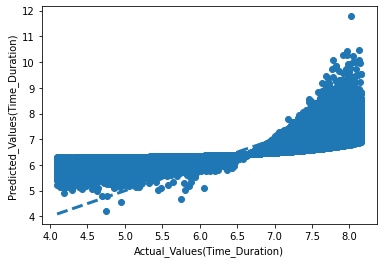


Prediction by Lasso :
 [6.2986956  6.42137664 6.73234552 ... 6.54492695 6.85883694 6.46931804]


<Figure size 432x216 with 0 Axes>

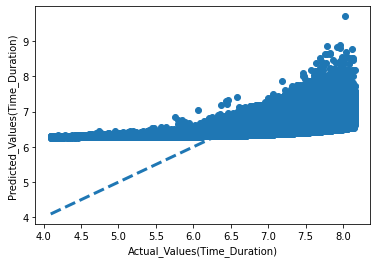

Prediction by LinearRegression :
 [5.89666736 6.65768676 7.05149781 ... 6.63218584 7.17880812 6.50137825]


<Figure size 432x216 with 0 Axes>

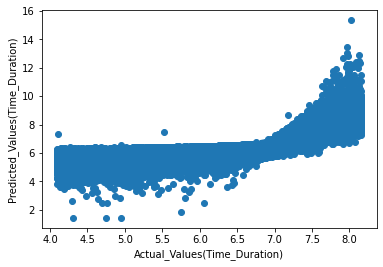


Prediction by DecisionTreeRegressor :
 [5.2641395  6.86272315 7.23958193 ... 6.89098488 7.17468817 6.85059428]


<Figure size 432x216 with 0 Axes>

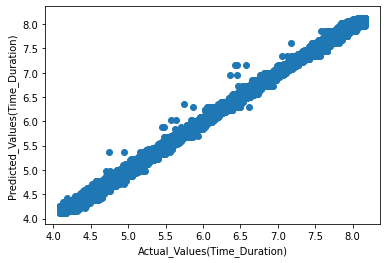


Prediction by RandomForestRegressor :
 [5.25358464 6.86731172 7.23734991 ... 6.91161121 7.18198948 6.79423931]


<Figure size 432x216 with 0 Axes>

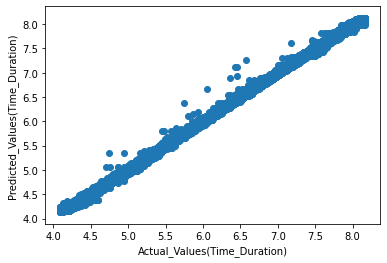

[08:50:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Prediction by Xgboost :
 [5.2147613 6.884008  7.239942  ... 6.9024625 7.170125  6.797147 ]


<Figure size 432x216 with 0 Axes>

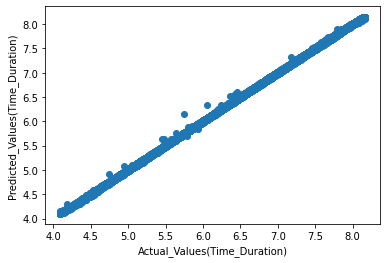


Prediction by Ridge regression :
 [5.89674848 6.65767538 7.05148038 ... 6.63214356 7.1786528  6.50136647]


<Figure size 432x216 with 0 Axes>

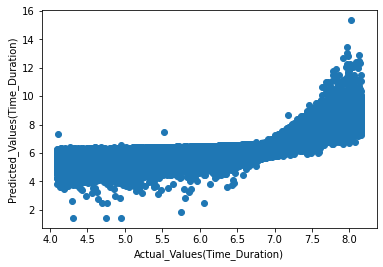

In [72]:
ml_output_unscaled = run_ml_models(models)

In [73]:
ml_output_unscaled

,Training_Score,Testing_Score,R2_Score,ADJ_R2,MSE,RMSE
ElasticNet,0.569149,0.568829,0.568829,0.568809,0.219527,0.468537
Lasso,0.310297,0.308879,0.308879,0.308848,0.351878,0.593193
Linear Regression,0.705167,0.707535,0.707535,0.707522,0.148906,0.385883
Decision Tree Regression,0.997663,0.997565,0.997565,0.997565,0.001240,0.035210
Random Forest Regression,0.999110,0.999067,0.999067,0.999067,0.000475,0.021795
XGboost,0.999948,0.999941,0.999941,0.999941,0.000030,0.005479
Ridge Regression,0.705167,0.707535,0.707535,0.707522,0.148906,0.385883


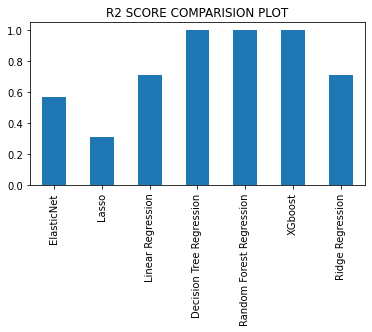

In [74]:
# Using our defined funtion that will plot R2 score bar chart for us.

R2_score_plot(ml_output_unscaled.index, ml_output_unscaled)

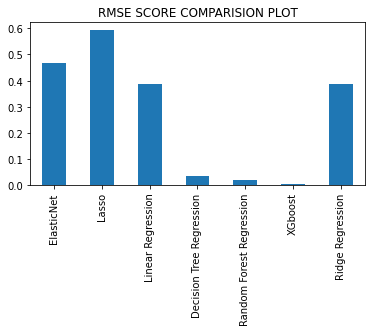

In [75]:
# # Using our defined funtion that will plot RMSE score bar chart for us.

RMSE_score_plot(ml_output_unscaled.index, ml_output_unscaled)

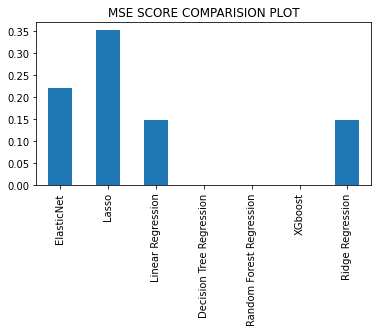

In [76]:
# # Using our defined funtion that will plot MSE score bar chart for us.

MSE_score_plot(ml_output_unscaled.index, ml_output_unscaled)

## Checking regression after Scaling

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)   # spliting data in train 70% and test 30%


In [78]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape   # checking shape


((960682, 19), (411722, 19), (960682,), (411722,))

In [79]:
# importing standard scaler from sklearn
from sklearn.preprocessing import StandardScaler

In [80]:
# Creating object for our standard scaler
scaler = StandardScaler()

> Scaling our DF using standard scaler

In [81]:
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

print("Data scaling is complete")

Data scaling is complete



Prediction by ElasticNet :
 [6.45382095 6.45382095 6.45382095 ... 6.45382095 6.45382095 6.45382095]


<Figure size 432x216 with 0 Axes>

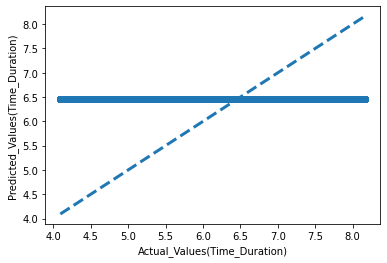


Prediction by Lasso :
 [6.45382095 6.45382095 6.45382095 ... 6.45382095 6.45382095 6.45382095]


<Figure size 432x216 with 0 Axes>

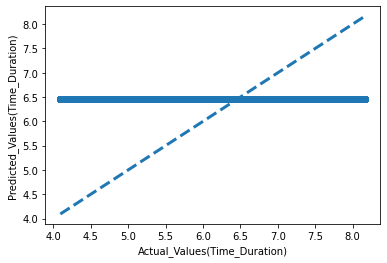

Prediction by LinearRegression :
 [6.22176214 6.13503995 8.93595043 ... 6.62911778 6.28259821 6.23484371]


<Figure size 432x216 with 0 Axes>

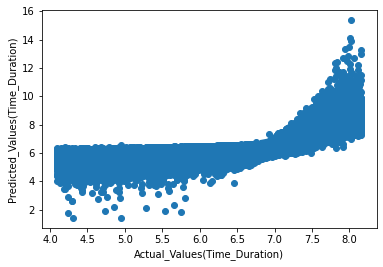


Prediction by DecisionTreeRegressor :
 [6.45563229 5.94213851 8.13164405 ... 6.9626917  6.22623433 5.90370589]


<Figure size 432x216 with 0 Axes>

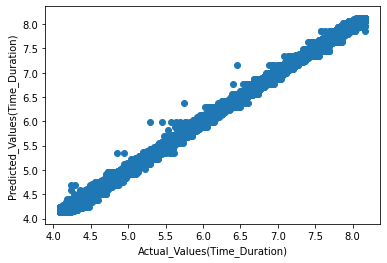


Prediction by RandomForestRegressor :
 [6.43547907 5.93474906 8.11811979 ... 6.9460442  6.21711632 5.9213735 ]


<Figure size 432x216 with 0 Axes>

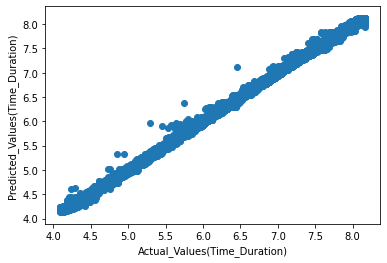

[08:58:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Prediction by Xgboost :
 [6.435965  5.9047956 8.134499  ... 6.937214  6.181064  5.9035215]


<Figure size 432x216 with 0 Axes>

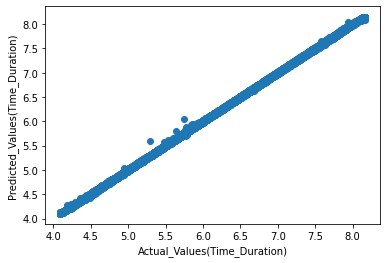


Prediction by Ridge regression :
 [6.22274413 6.13576798 8.93622819 ... 6.6300132  6.28285332 6.23454614]


<Figure size 432x216 with 0 Axes>

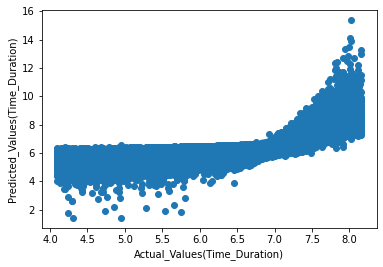

In [82]:
ml_output_scaled = run_ml_models(models)

In [83]:
ml_output_scaled

,Training_Score,Testing_Score,R2_Score,ADJ_R2,MSE,RMSE
ElasticNet,0.000000,-0.000002,-0.000002,-0.000048,0.509628,0.713883
Lasso,0.000000,-0.000002,-0.000002,-0.000048,0.509628,0.713883
Linear Regression,0.705660,0.706395,0.706395,0.706381,0.149629,0.386819
Decision Tree Regression,0.997671,0.997585,0.997585,0.997585,0.001231,0.035082
Random Forest Regression,0.999193,0.999159,0.999159,0.999159,0.000429,0.020703
XGboost,0.999947,0.999941,0.999941,0.999941,0.000030,0.005461
Ridge Regression,0.705661,0.706396,0.706396,0.706382,0.149629,0.386819


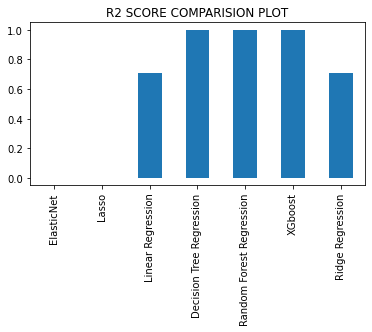

In [84]:
# Using our defined funtion that will plot R2 score bar chart for us.

R2_score_plot(ml_output_scaled.index, ml_output_scaled)

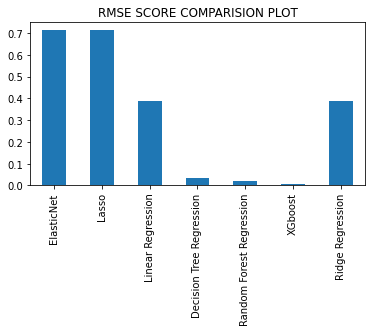

In [85]:
# # Using our defined funtion that will plot RMSE score bar chart for us.

RMSE_score_plot(ml_output_scaled.index, ml_output_scaled)

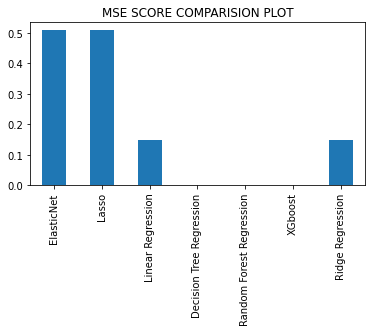

In [86]:
# # Using our defined funtion that will plot MSE score bar chart for us.

MSE_score_plot(ml_output_scaled.index, ml_output_scaled)